In [23]:
import pandas as pd
import numpy as np

df = df.sort_values("elo_loser", ascending = False)

In [24]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv('cleaned_data.csv')


In [25]:
df

,Unnamed: 0,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,Lsets,Comment,B365W,B365L,PSW,PSL,elo_winner,elo_loser,proba_elo,Year
0,125,1,Adelaide,AAPT Championships,2004-01-05,International,Outdoor,Hard,1st Round,3.0,...,0.0,Completed,1.16,4.500,1.241,4.550,1500.000000,1500.000000,0.500000,2004
1,126,1,Adelaide,AAPT Championships,2004-01-05,International,Outdoor,Hard,1st Round,3.0,...,1.0,Completed,2.00,1.720,2.170,1.752,1569.125950,1500.000000,0.598188,2004
2,127,1,Adelaide,AAPT Championships,2004-01-05,International,Outdoor,Hard,1st Round,3.0,...,0.0,Completed,1.83,1.830,1.730,2.210,1484.000000,1515.297526,0.455081,2004
3,128,1,Adelaide,AAPT Championships,2004-01-05,International,Outdoor,Hard,1st Round,3.0,...,1.0,Completed,1.40,2.750,1.459,2.930,1500.000000,1500.000000,0.500000,2004
4,130,1,Adelaide,AAPT Championships,2004-01-05,International,Outdoor,Hard,1st Round,3.0,...,1.0,Completed,1.80,1.909,1.862,2.000,1457.584184,1500.000000,0.439260,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48269,63983,67,Paris,BNP Paribas Masters,2022-11-04,Masters 1000,Indoor,Hard,Quarterfinals,3.0,...,0.0,Completed,1.11,6.500,1.140,6.950,1999.139070,1666.505169,0.871557,2022
48270,63984,67,Paris,BNP Paribas Masters,2022-11-04,Masters 1000,Indoor,Hard,Quarterfinals,3.0,...,0.0,Completed,1.40,3.000,1.450,2.970,1862.217834,1762.110424,0.640207,2022
48271,63985,67,Paris,BNP Paribas Masters,2022-11-05,Masters 1000,Indoor,Hard,Semifinals,3.0,...,0.0,Completed,2.75,1.440,2.810,1.500,1853.973200,1864.692246,0.484579,2022
48272,63986,67,Paris,BNP Paribas Masters,2022-11-05,Masters 1000,Indoor,Hard,Semifinals,3.0,...,1.0,Completed,1.20,4.500,1.240,4.620,2003.249251,1873.731196,0.678212,2022


In [44]:
df.describe()

,Unnamed: 0,ATP,Best of,WRank,LRank,Wsets,Lsets,B365W,B365L,PSW,PSL,elo_winner,elo_loser,proba_elo,Year
count,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000,48274.000000
mean,31890.562539,32.462941,3.390852,57.810105,89.871649,2.154141,0.415627,1.835023,3.504799,1.925780,4.010322,1640.950740,1581.087776,0.570640,2013.514169
std,18433.338094,18.054251,0.793065,70.033946,118.322737,0.460303,0.562297,1.120441,3.420363,1.277379,5.070802,152.405246,122.800870,0.187052,5.831497
min,125.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.971000,0.967000,0.972000,1.010000,1291.228216,1298.412989,0.011497,2004.000000
25%,16000.250000,19.000000,3.000000,17.000000,35.000000,2.000000,0.000000,1.250000,1.720000,1.280000,1.787000,1526.629633,1491.217927,0.441720,2008.000000
50%,31851.500000,32.000000,3.000000,41.000000,64.000000,2.000000,0.000000,1.500000,2.500000,1.560000,2.610000,1620.837678,1559.204078,0.571556,2014.000000
75%,48058.750000,49.000000,3.000000,76.000000,103.000000,2.000000,1.000000,2.100000,3.750000,2.150000,4.110000,1725.357897,1654.653872,0.709283,2018.000000
max,63987.000000,67.000000,5.000000,1890.000000,4915.000000,3.000000,2.000000,34.000000,67.000000,46.000000,121.000000,2257.587043,2259.376602,0.989407,2024.000000


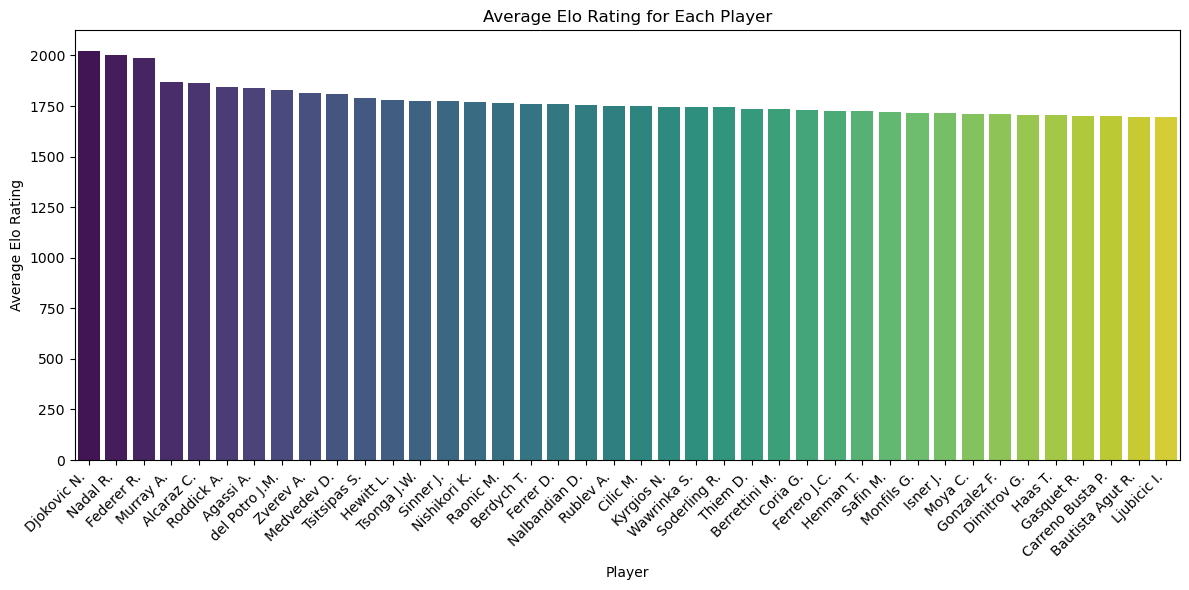

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sort DataFrame by average Elo rating in descending order
winner_elo = df.groupby('Winner')['elo_winner'].mean().sort_values(ascending=False)
winner_elo = winner_elo.head(40)

# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=winner_elo.index, y=winner_elo.values, palette='viridis')

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Average Elo Rating')
plt.title('Average Elo Rating for Each Player')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


       Unnamed: 0  ATP Location   Tournament        Date       Series  \
24579       32298   32   London  Masters Cup  2020-11-15  Masters Cup   
24577       32296   32    Paris  French Open  2019-06-09   Grand Slam   
24575       32294   32    Paris  French Open  2019-06-07   Grand Slam   
24572       32291   32    Paris  French Open  2019-06-04   Grand Slam   
24565       32284   32    Paris  French Open  2019-06-02   Grand Slam   

         Court Surface          Round  Best of  ... Lsets    Comment  B365W  \
24579   Indoor    Hard    Round Robin      3.0  ...   0.0  Completed  1.530   
24577  Outdoor    Clay      The Final      5.0  ...   1.0  Completed  1.200   
24575  Outdoor    Clay     Semifinals      5.0  ...   0.0  Completed  1.120   
24572  Outdoor    Clay  Quarterfinals      5.0  ...   0.0  Completed  1.020   
24565  Outdoor    Clay      4th Round      5.0  ...   0.0  Completed  1.005   

       B365L   PSW    PSL   elo_winner    elo_loser  proba_elo  Year  
24579   2.37  1

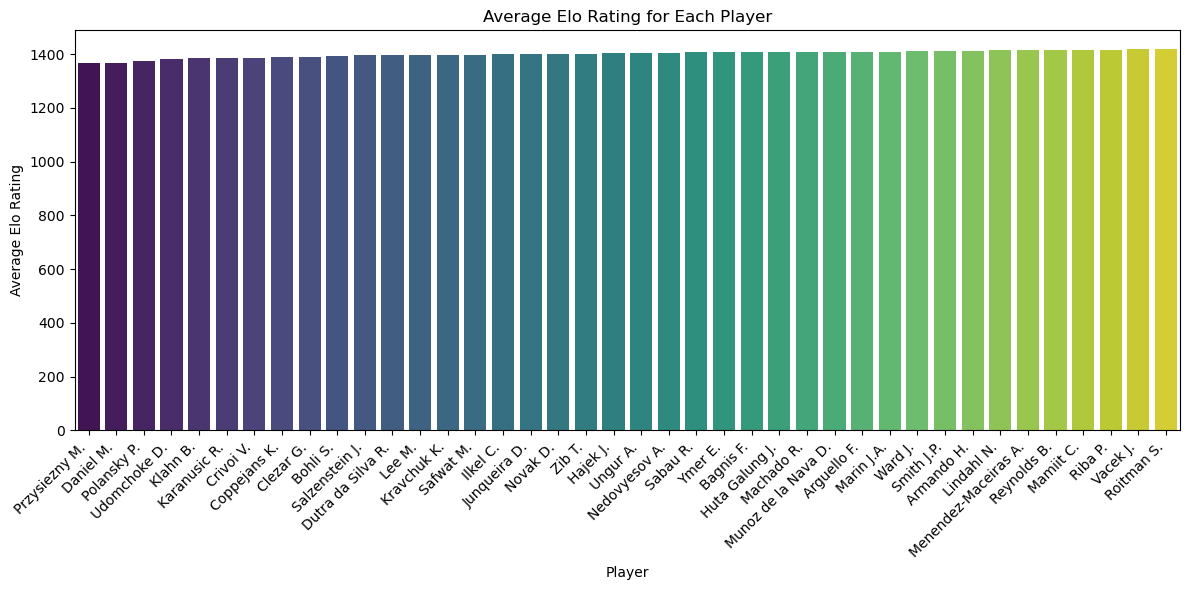

In [42]:

import seaborn as sns
import matplotlib.pyplot as plt

# Replace 'Winner' and 'elo_winner' with the actual column names 
df = df.sort_values("elo_winner", ascending = False)
print(df.head())
winner_elo = df.groupby('Winner')['elo_winner'].mean().sort_values()
winner_elo = winner_elo.head(40)
# Create a bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=winner_elo.index, y=winner_elo.values, palette='viridis')

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Average Elo Rating')
plt.title('Average Elo Rating for Each Player')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [36]:
import pandas as pd


# und die Elos in den Spalten 'elo_winner' und 'elo_loser' sind

# Kombinieren Sie die Daten aus den Spalten 'Winner' und 'elo_winner'
winner_elo = df[['Winner', 'elo_winner']].rename(columns={'Winner': 'Player', 'elo_winner': 'Elo'})

# Kombinieren Sie die Daten aus den Spalten 'Loser' und 'elo_loser'
loser_elo = df[['Loser', 'elo_loser']].rename(columns={'Loser': 'Player', 'elo_loser': 'Elo'})

# Kombinieren Sie beide DataFrames
combined_elo = pd.concat([winner_elo, loser_elo])

# Berechnen Sie den Durchschnitt der Elo-Wertungen für jeden Spieler
average_elo = combined_elo.groupby('Player')['Elo'].mean().sort_values()

# Drucken Sie den Spieler mit der niedrigsten Durchschnitts-Elo aus
print("Spieler mit der niedrigsten Durchschnitts-Elo:")
print(average_elo.head(1))
df.head(100)

Spieler mit der niedrigsten Durchschnitts-Elo:
Player
Prinosil D.    1371.815813
Name: Elo, dtype: float64


,Unnamed: 0,ATP,Location,Tournament,Date,Series,Court,Surface,Round,Best of,...,Lsets,Comment,B365W,B365L,PSW,PSL,elo_winner,elo_loser,proba_elo,Year
13379,17431,19,Monte Carlo,Monte Carlo Masters,2021-04-13,Masters 1000,Outdoor,Clay,1st Round,3.0,...,0.0,Completed,2.00,1.80,1.950,1.950,1291.228216,1484.396398,0.247505,2021
6598,8721,9,Buenos Aires,Argentina Open,2021-03-01,ATP250,Outdoor,Clay,1st Round,3.0,...,0.0,Completed,1.80,2.00,1.830,2.070,1298.154794,1567.431028,0.175075,2021
27433,36346,36,London,Wimbledon,2010-06-21,Grand Slam,Outdoor,Grass,1st Round,5.0,...,0.0,Completed,5.50,1.12,4.880,1.230,1304.515829,1590.070946,0.161950,2010
8443,11285,13,Buenos Aires,Copa Telmex,2010-02-16,ATP250,Outdoor,Clay,1st Round,3.0,...,0.0,Completed,2.00,1.72,1.962,1.962,1307.142147,1489.227469,0.259577,2010
2627,3529,5,Sydney,Apia International,2015-01-13,ATP250,Outdoor,Hard,1st Round,3.0,...,0.0,Completed,2.75,1.40,2.890,1.470,1308.007540,1609.596434,0.149811,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,11624,13,Santiago,Chile Open,2021-03-08,ATP250,Indoor,Clay,1st Round,3.0,...,1.0,Completed,2.20,1.66,2.190,1.750,1348.262346,1407.323066,0.415814,2021
31671,41681,41,Bastad,SkiStar Swedish Open,2018-07-17,ATP250,Outdoor,Clay,1st Round,3.0,...,0.0,Completed,1.72,2.00,1.850,2.050,1348.438099,1499.189018,0.295714,2018
41280,54604,54,Bangkok,Thailand Open,2006-09-27,International,Indoor,Hard,1st Round,3.0,...,0.0,Completed,1.66,2.10,1.769,2.200,1348.619013,1449.127052,0.359262,2006
7099,9405,10,Buenos Aires,Argentina Open,2019-02-15,ATP250,Outdoor,Clay,Quarterfinals,3.0,...,0.0,Completed,1.53,2.50,1.490,2.870,1348.733610,1531.306075,0.259039,2019


In [28]:
wins_count = df['Winner'].value_counts()

# Display the count of wins for each player
print(wins_count.head(40))
winner = wins_count.head(40)
winner

Winner
Djokovic N.         933
Nadal R.            929
Federer R.          901
Murray A.           617
Ferrer D.           613
Gasquet R.          554
Berdych T.          549
Wawrinka S.         507
Cilic M.            492
Verdasco F.         481
Monfils G.          473
Isner J.            440
Simon G.            440
Lopez F.            413
Nishikori K.        401
Kohlschreiber P.    399
Dimitrov G.         399
Tsonga J.W.         386
Zverev A.           368
Fognini F.          364
Robredo T.          358
Roddick A.          358
del Potro J.M.      356
Raonic M.           355
Davydenko N.        351
Youzhny M.          348
Almagro N.          348
Anderson K.         341
Seppi A.            337
Thiem D.            331
Querrey S.          326
Karlovic I.         320
Medvedev D.         306
Baghdatis M.        298
Goffin D.           293
Monaco J.           282
Mannarino A.        278
Tsitsipas S.        273
Nieminen J.         273
Haas T.             270
Name: count, dtype: int64


Winner
Djokovic N.         933
Nadal R.            929
Federer R.          901
Murray A.           617
Ferrer D.           613
Gasquet R.          554
Berdych T.          549
Wawrinka S.         507
Cilic M.            492
Verdasco F.         481
Monfils G.          473
Isner J.            440
Simon G.            440
Lopez F.            413
Nishikori K.        401
Kohlschreiber P.    399
Dimitrov G.         399
Tsonga J.W.         386
Zverev A.           368
Fognini F.          364
Robredo T.          358
Roddick A.          358
del Potro J.M.      356
Raonic M.           355
Davydenko N.        351
Youzhny M.          348
Almagro N.          348
Anderson K.         341
Seppi A.            337
Thiem D.            331
Querrey S.          326
Karlovic I.         320
Medvedev D.         306
Baghdatis M.        298
Goffin D.           293
Monaco J.           282
Mannarino A.        278
Tsitsipas S.        273
Nieminen J.         273
Haas T.             270
Name: count, dtype: int64

In [29]:
loser_count = df['Loser'].value_counts()

# Display the count of wins for each player
print(loser_count.head(40))
loser = loser_count.head(40)
loser

Loser
Verdasco F.         397
Lopez F.            394
Seppi A.            367
Simon G.            349
Gasquet R.          349
Fognini F.          331
Kohlschreiber P.    327
Garcia-Lopez G.     317
Ferrer D.           309
Wawrinka S.         303
Mannarino A.        300
Karlovic I.         297
Youzhny M.          291
Paire B.            290
Berdych T.          289
Cilic M.            285
Monfils G.          285
Querrey S.          285
Chardy J.           272
Isner J.            271
Dimitrov G.         261
Nieminen J.         260
Baghdatis M.        254
Benneteau J.        253
Haase R.            252
Robredo T.          245
Anderson K.         244
Almagro N.          242
Sousa J.            241
Melzer J.           240
Mayer F.            237
Murray A.           235
Ramos-Vinolas A.    234
Troicki V.          229
Istomin D.          227
Andujar P.          226
Goffin D.           225
Davydenko N.        225
Monaco J.           222
Lajovic D.          222
Name: count, dtype: int64


Loser
Verdasco F.         397
Lopez F.            394
Seppi A.            367
Simon G.            349
Gasquet R.          349
Fognini F.          331
Kohlschreiber P.    327
Garcia-Lopez G.     317
Ferrer D.           309
Wawrinka S.         303
Mannarino A.        300
Karlovic I.         297
Youzhny M.          291
Paire B.            290
Berdych T.          289
Cilic M.            285
Monfils G.          285
Querrey S.          285
Chardy J.           272
Isner J.            271
Dimitrov G.         261
Nieminen J.         260
Baghdatis M.        254
Benneteau J.        253
Haase R.            252
Robredo T.          245
Anderson K.         244
Almagro N.          242
Sousa J.            241
Melzer J.           240
Mayer F.            237
Murray A.           235
Ramos-Vinolas A.    234
Troicki V.          229
Istomin D.          227
Andujar P.          226
Goffin D.           225
Davydenko N.        225
Monaco J.           222
Lajovic D.          222
Name: count, dtype: int64

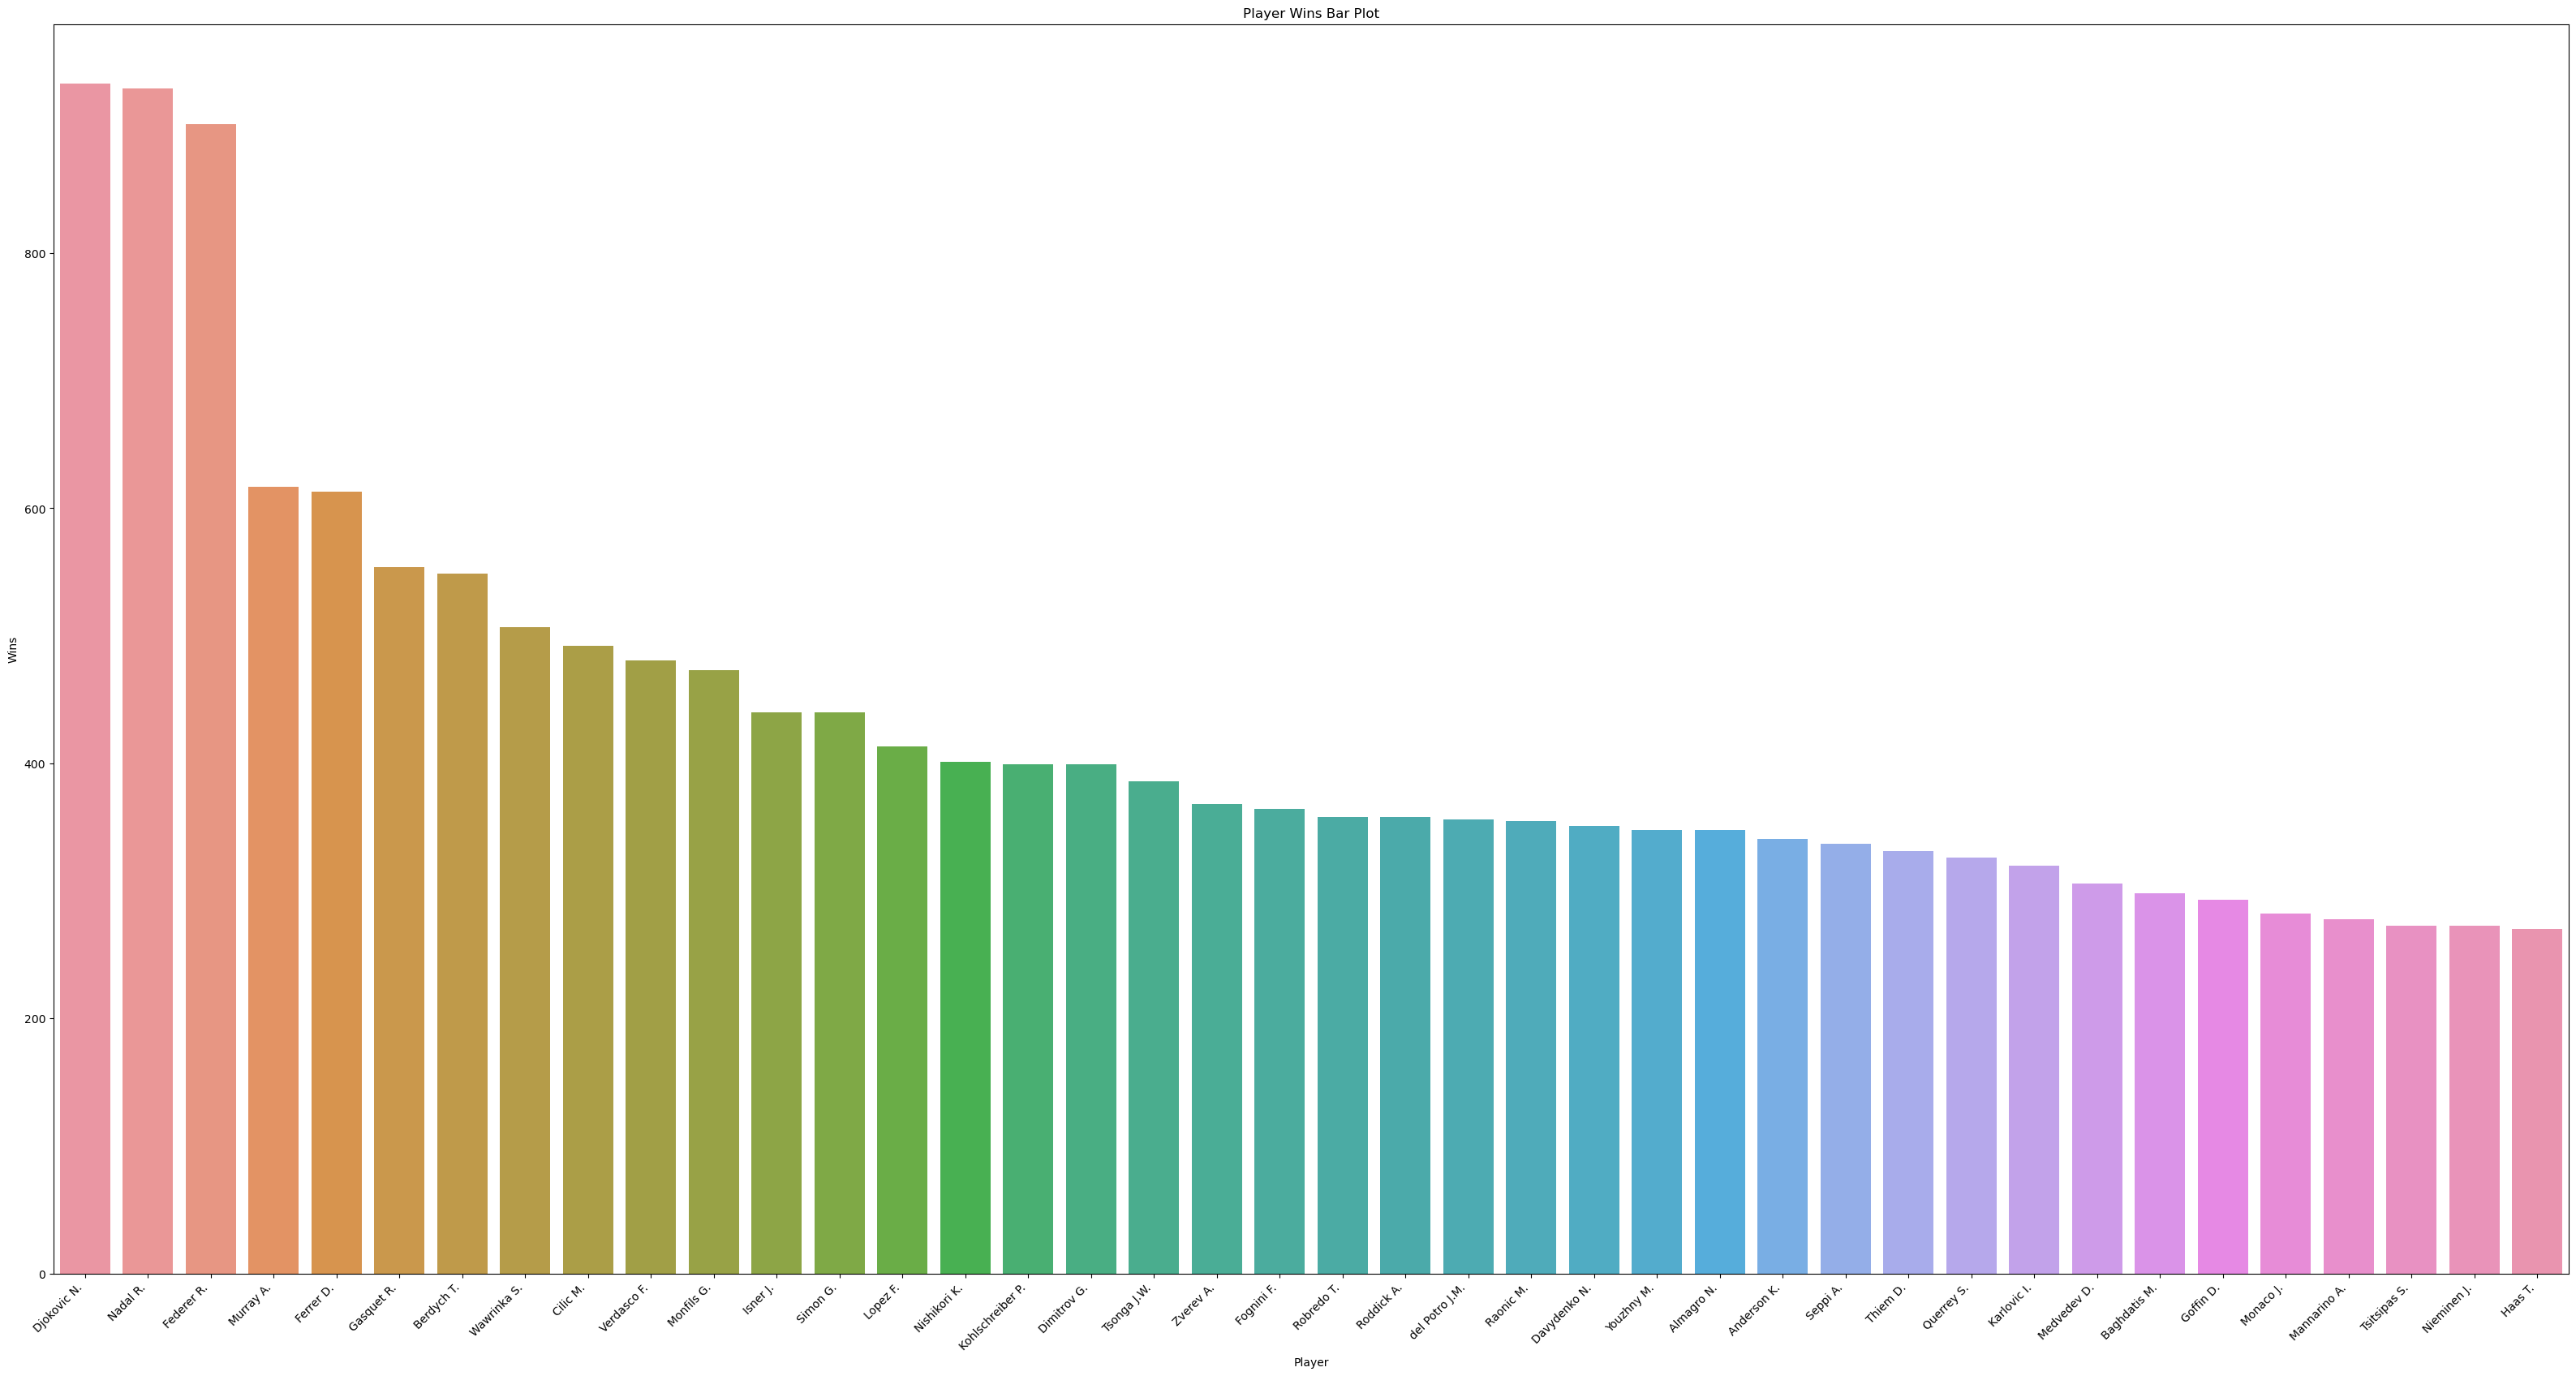

In [30]:
plt.figure(figsize=(40, 20))
sns.barplot(x = winner.index, y = winner.values)
plt.xlabel("Player")
plt.ylabel("Wins")
plt.title("Player Wins Bar Plot")
plt.xticks(rotation=45, ha='right')
plt.show();


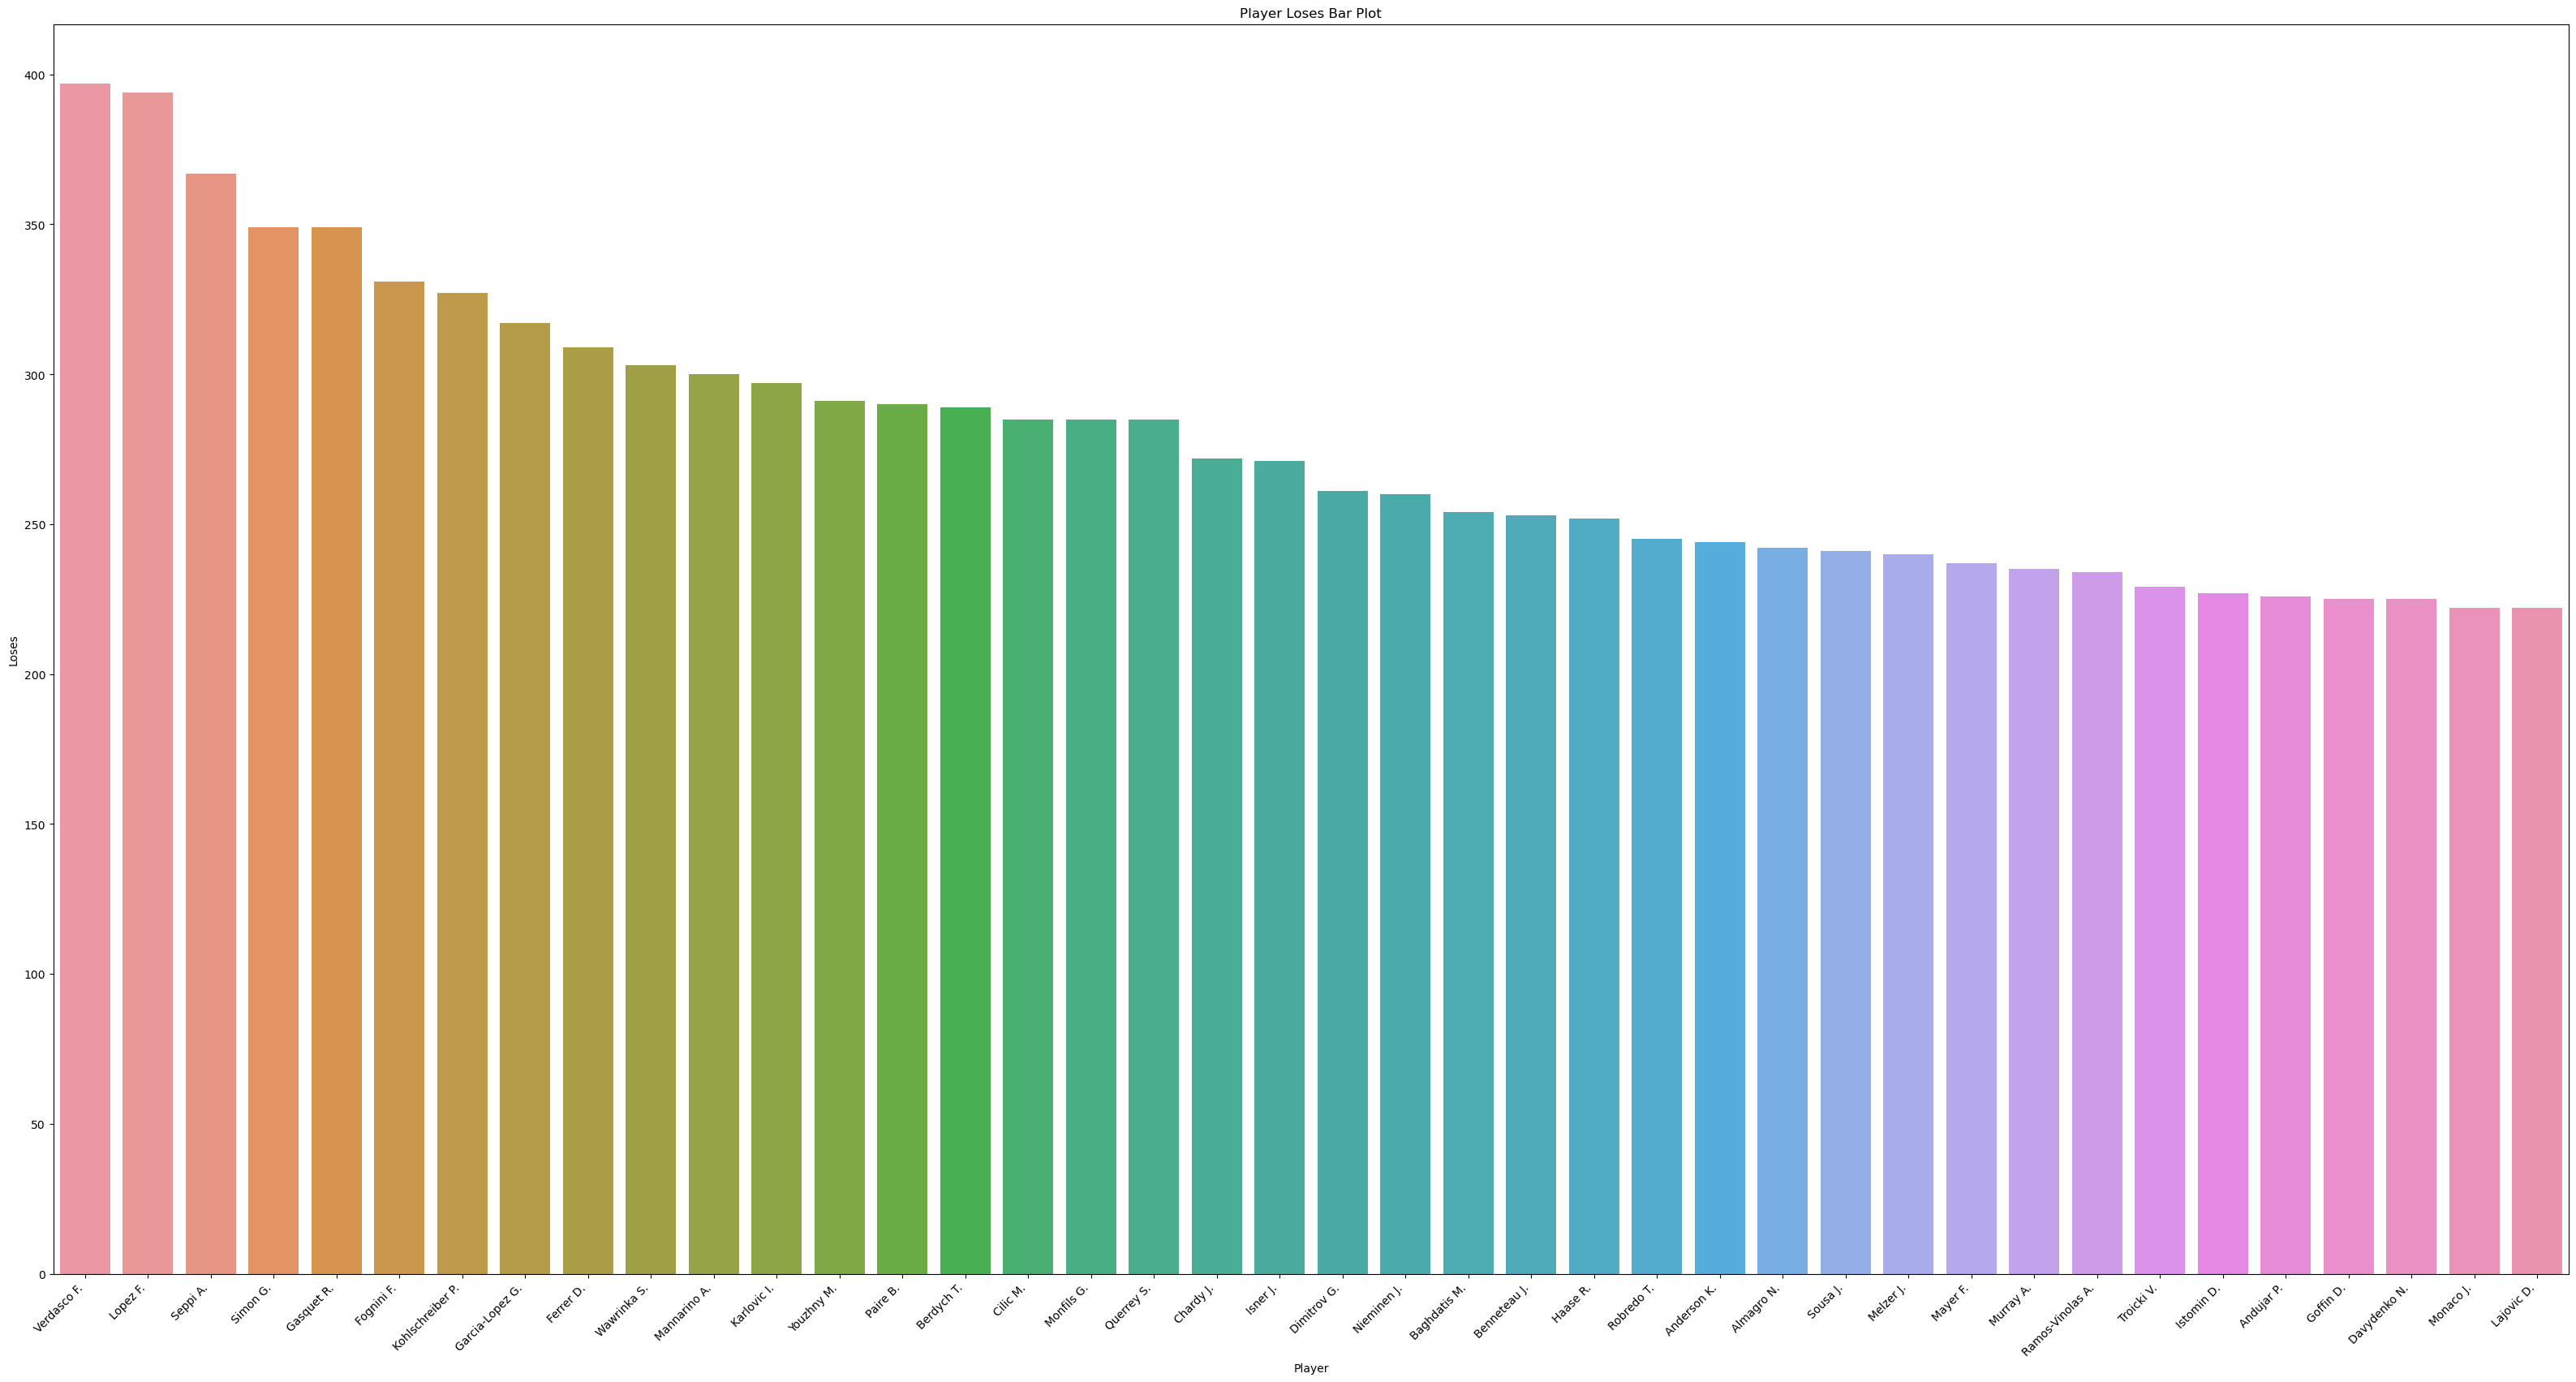

In [31]:
plt.figure(figsize=(40, 20))
sns.barplot(x = loser.index, y = loser.values)
plt.xlabel("Player")
plt.ylabel("Loses")
plt.title("Player Loses Bar Plot")
plt.xticks(rotation=45, ha='right')
plt.show();

In [32]:
final_games = df[df['Round'] == 'The Final']
final_games_winner = final_games[["Winner", "Tournament", "Date"]]
final_games_winner
tr = tr.drop("Date", axis = 1)
tr = final_games_winner.groupby("Winner")
tr

NameError: name 'tr' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

final_games = df[df['Round'] == 'The Final']
final_games_winner = final_games[["Winner", "Tournament"]]

# Grouping by 'Winner' and counting the number of unique tournaments won by each player
player_tournament_wins = final_games_winner.groupby("Winner")["Tournament"].nunique().reset_index(name='TotalTournamentsWon')

# Filtering out players with zero tournament wins
player_tournament_wins = player_tournament_wins[player_tournament_wins['TotalTournamentsWon'] > 0]

# Creating a bar plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x="Winner", y="TotalTournamentsWon", data=player_tournament_wins, palette="viridis")

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Total Number of Tournaments Won')
plt.title('Total Number of Tournaments Won by Each Player (At Least One Win)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

final_games = df[df['Round'] == 'The Final']
final_games_winner = final_games[["Winner", "Tournament"]]

# Grouping by 'Winner' and counting the number of unique tournaments won by each player
player_tournament_wins = final_games_winner.groupby("Winner")["Tournament"].size().reset_index(name='TotalTournamentsWon')

# Filtering out players with zero tournament wins
player_tournament_wins = player_tournament_wins[player_tournament_wins['TotalTournamentsWon'] > 0]

# Creating a bar plot using Seaborn
plt.figure(figsize=(15, 8))
sns.barplot(x="Winner", y="TotalTournamentsWon", data=player_tournament_wins, palette="viridis")

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Total Number of Tournaments Won')
plt.title('Total Number of Tournaments Won by Each Player (At Least One Win)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
tr_max = player_tournament_wins.sort_values("TotalTournamentsWon", ascending = False)

In [ ]:
tr_max

In [ ]:
# Creating a bar plot using Seaborn
plt.figure(figsize=(40, 20))
sns.barplot(x=tr_max["Winner"], y=tr_max["TotalTournamentsWon"])

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Total Number of Tournaments Won')
plt.title('Total Number of Tournaments Won by Each Player (At Least One Win)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot

plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

final_games = df[df['Round'] == 'The Final']
final_games_loser = final_games[["Loser", "Tournament"]]

# Grouping by 'Loser' and counting the number of finals lost by each player
player_final_losses = final_games_loser.groupby("Loser")["Tournament"].size().reset_index(name='TotalFinalsLost')

# Filtering out players with zero final losses
player_final_losses = player_final_losses[player_final_losses['TotalFinalsLost'] > 0]

# Sorting by the total number of finals lost in descending order
final_losses_max = player_final_losses.sort_values("TotalFinalsLost", ascending=False)

# Display the result
print(final_losses_max.head())

# Visualizing the result with a bar plot
plt.figure(figsize=(40, 20))
sns.barplot(x="Loser", y="TotalFinalsLost", data=final_losses_max, palette="viridis")

# Set labels and title
plt.xlabel('Player')
plt.ylabel('Total Number of Finals Lost')
plt.title('Total Number of Finals Lost by Each Player (Descending Order)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot

plt.show()


In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
cleaned_df = pd.read_csv('cleaned_data.csv')
cleaned
